# 1. Import the needed libraries

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# data partition
from sklearn.model_selection import train_test_split

#filter methods
# spearman 
# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

#wrapper methods
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE


# embedded methods
from sklearn.linear_model import LassoCV

import warnings
warnings.filterwarnings('ignore')

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# 2. Import data

In [101]:
sample_submission = pd.read_csv("C:/Users/duart/Downloads/sample_submission.csv")
test = pd.read_csv("C:/Users/duart/Downloads/test.csv")
train = pd.read_csv("C:/Users/duart/Downloads/train.csv")

# 3. Explore the data

In [102]:
sample_submission.head()

,encounter_id,readmitted_binary
0,499502,No
1,447319,No
2,309126,Yes
3,181183,Yes
4,359339,No


In [103]:
sample_submission.tail()

,encounter_id,readmitted_binary
30525,451150,No
30526,549298,Yes
30527,327586,Yes
30528,351214,Yes
30529,914270,Yes


In [104]:
test.head()

,encounter_id,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,...,number_of_medications,primary_diagnosis,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication
0,499502,USA,103232799,Caucasian,Male,[80-90),?,HM,0,0,...,14,491,414,250,6,NaN,NaN,No,Yes,['metformin']
1,447319,USA,93395304,Caucasian,Male,[20-30),?,HM,0,0,...,7,250.13,70,794,7,>300,NaN,No,No,[]
2,309126,USA,6281586,AfricanAmerican,Male,[30-40),?,?,0,0,...,12,786,250.6,536,6,NaN,NaN,No,Yes,['insulin']
3,181183,USA,67381308,Caucasian,Male,[50-60),?,BC,0,0,...,16,820,873,E884,9,NaN,NaN,Ch,Yes,"['metformin', 'glyburide', 'insulin']"
4,359339,USA,71670204,Caucasian,Male,[60-70),?,?,0,0,...,10,599,427,414,9,NaN,NaN,No,Yes,['metformin']


In [105]:
test.tail()

,encounter_id,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,...,number_of_medications,primary_diagnosis,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication
30525,451150,USA,85707450,Caucasian,Male,[70-80),?,HM,0,0,...,11,584,276,276,9,NaN,NaN,No,No,[]
30526,549298,USA,328887,Caucasian,Male,[60-70),?,?,0,0,...,19,428,250.83,276,9,NaN,NaN,No,Yes,['insulin']
30527,327586,USA,21915459,Caucasian,Female,[80-90),?,?,0,0,...,22,996,403,250,6,NaN,NaN,No,Yes,['insulin']
30528,351214,USA,17823546,Caucasian,Male,NaN,?,MC,0,0,...,21,153,780,285,5,NaN,>7,Ch,Yes,"['glipizide', 'pioglitazone', 'insulin']"
30529,914270,USA,42043239,Caucasian,Female,[60-70),?,MD,0,0,...,11,486,?,428,8,NaN,NaN,No,Yes,['pioglitazone']


In [106]:
train.head()

,encounter_id,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
0,533253,USA,70110,Caucasian,Female,[70-80),?,?,0,0,...,276,466,8,NaN,NaN,No,No,[],No,>30 days
1,426224,USA,29775006,AfricanAmerican,Male,[50-60),?,?,0,0,...,785,162,9,NaN,NaN,No,Yes,['insulin'],No,No
2,634063,USA,80729253,Caucasian,Female,[60-70),?,?,0,0,...,135,250,6,NaN,NaN,Ch,Yes,"['glimepiride', 'insulin']",No,No
3,890610,USA,2919042,AfricanAmerican,Male,[60-70),?,MC,0,0,...,562,455,5,NaN,NaN,No,No,[],No,No
4,654194,USA,84871971,Caucasian,Female,[70-80),?,HM,1,0,...,599,428,9,NaN,NaN,No,No,[],No,>30 days


In [107]:
train.tail()

,encounter_id,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
71231,660160,USA,24531381,AfricanAmerican,Female,[80-90),?,MC,0,1,...,786,250,9,NaN,>7,Ch,Yes,"['metformin', 'glyburide', 'insulin']",No,No
71232,826429,USA,4663818,AfricanAmerican,Female,[70-80),?,?,0,0,...,197,V66,6,NaN,>7,Ch,Yes,"['metformin', 'glyburide']",No,No
71233,332030,USA,23397147,Caucasian,Female,[60-70),?,?,0,2,...,491,276,9,>300,NaN,Ch,Yes,"['glyburide', 'insulin']",Yes,<30 days
71234,757560,USA,52161750,Caucasian,Male,[60-70),?,BC,0,0,...,157,250.8,5,NaN,NaN,Ch,Yes,"['glyburide', 'insulin']",No,No
71235,459757,USA,88410897,Caucasian,Male,[70-80),?,BC,0,0,...,250,401,8,NaN,NaN,Ch,Yes,['insulin'],No,>30 days


In [108]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30530 entries, 0 to 30529
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   encounter_id       30530 non-null  int64 
 1   readmitted_binary  30530 non-null  object
dtypes: int64(1), object(1)
memory usage: 477.2+ KB


In [109]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30530 entries, 0 to 30529
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   encounter_id                           30530 non-null  int64 
 1   country                                30530 non-null  object
 2   patient_id                             30530 non-null  int64 
 3   race                                   28996 non-null  object
 4   gender                                 30530 non-null  object
 5   age                                    28999 non-null  object
 6   weight                                 30530 non-null  object
 7   payer_code                             30530 non-null  object
 8   outpatient_visits_in_previous_year     30530 non-null  int64 
 9   emergency_visits_in_previous_year      30530 non-null  int64 
 10  inpatient_visits_in_previous_year      30530 non-null  int64 
 11  admission_type 

In [110]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71236 entries, 0 to 71235
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   encounter_id                           71236 non-null  int64 
 1   country                                71236 non-null  object
 2   patient_id                             71236 non-null  int64 
 3   race                                   67682 non-null  object
 4   gender                                 71236 non-null  object
 5   age                                    67679 non-null  object
 6   weight                                 71236 non-null  object
 7   payer_code                             71236 non-null  object
 8   outpatient_visits_in_previous_year     71236 non-null  int64 
 9   emergency_visits_in_previous_year      71236 non-null  int64 
 10  inpatient_visits_in_previous_year      71236 non-null  int64 
 11  admission_type 

In [111]:
sample_submission.describe(include =['O'])

,readmitted_binary
count,30530
unique,2
top,No
freq,15335


In [112]:
test.describe(include ='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
encounter_id,30530.0,NaN,NaN,NaN,550354.535113,258945.047642,100060.0,326864.0,553228.0,773081.25,999944.0
country,30530,1,USA,30530,NaN,NaN,NaN,NaN,NaN,NaN,NaN
patient_id,30530.0,NaN,NaN,NaN,54396016.59679,38463768.345676,378.0,23461418.25,45893601.0,87494890.5,189481478.0
race,28996,6,Caucasian,21617,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,30530,2,Female,16480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,28999,10,[70-80),7350,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight,30530,10,?,29579,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payer_code,30530,17,?,12055,NaN,NaN,NaN,NaN,NaN,NaN,NaN
outpatient_visits_in_previous_year,30530.0,NaN,NaN,NaN,0.368818,1.218842,0.0,0.0,0.0,0.0,40.0
emergency_visits_in_previous_year,30530.0,NaN,NaN,NaN,0.201539,0.974719,0.0,0.0,0.0,0.0,64.0


In [113]:
train.describe(include ='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
encounter_id,71236.0,NaN,NaN,NaN,548798.623716,259704.723154,100000.0,323118.5,548370.0,774058.5,999980.0
country,71236,1,USA,71236,NaN,NaN,NaN,NaN,NaN,NaN,NaN
patient_id,71236.0,NaN,NaN,NaN,54302279.330984,38795850.347332,135.0,23396510.25,45305631.0,87558374.25,189502619.0
race,67682,6,Caucasian,50693,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,71236,3,Female,38228,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,67679,10,[70-80),17359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight,71236,10,?,68990,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payer_code,71236,18,?,28201,NaN,NaN,NaN,NaN,NaN,NaN,NaN
outpatient_visits_in_previous_year,71236.0,NaN,NaN,NaN,0.369588,1.287469,0.0,0.0,0.0,0.0,42.0
emergency_visits_in_previous_year,71236.0,NaN,NaN,NaN,0.196249,0.910854,0.0,0.0,0.0,0.0,76.0


In [114]:
sample_submission['readmitted_binary'].value_counts()

No     15335
Yes    15195
Name: readmitted_binary, dtype: int64

In [115]:
test.corr(method = 'pearson')

,encounter_id,patient_id,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,average_pulse_bpm,length_of_stay_in_hospital,number_lab_tests,non_lab_procedures,number_of_medications,number_diagnoses
encounter_id,1.000000,-0.032390,-0.000065,-0.011630,0.000187,-0.010829,0.004192,0.014150,-0.003126,-0.002419,-0.008561
patient_id,-0.032390,1.000000,0.108780,0.059459,0.012036,-0.004827,-0.023426,0.016548,-0.009761,0.017303,0.232030
outpatient_visits_in_previous_year,-0.000065,0.108780,1.000000,0.096960,0.116707,-0.008089,-0.013590,-0.011182,-0.032225,0.047927,0.097227
emergency_visits_in_previous_year,-0.011630,0.059459,0.096960,1.000000,0.255600,0.010601,-0.010722,-0.011531,-0.042114,0.007467,0.051357
inpatient_visits_in_previous_year,0.000187,0.012036,0.116707,0.255600,1.000000,0.002179,0.069338,0.031713,-0.067337,0.059536,0.096935
average_pulse_bpm,-0.010829,-0.004827,-0.008089,0.010601,0.002179,1.000000,-0.000604,0.014450,0.000368,-0.004036,0.005583
length_of_stay_in_hospital,0.004192,-0.023426,-0.013590,-0.010722,0.069338,-0.000604,1.000000,0.322832,0.189335,0.470048,0.218988
number_lab_tests,0.014150,0.016548,-0.011182,-0.011531,0.031713,0.014450,0.322832,1.000000,0.065059,0.274969,0.148147
non_lab_procedures,-0.003126,-0.009761,-0.032225,-0.042114,-0.067337,0.000368,0.189335,0.065059,1.000000,0.380790,0.072048
number_of_medications,-0.002419,0.017303,0.047927,0.007467,0.059536,-0.004036,0.470048,0.274969,0.380790,1.000000,0.261105


In [116]:
train.corr(method = 'pearson')

,encounter_id,patient_id,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,average_pulse_bpm,length_of_stay_in_hospital,number_lab_tests,non_lab_procedures,number_of_medications,number_diagnoses
encounter_id,1.000000,-0.036909,-0.004919,-0.000135,0.006722,-0.003858,0.005079,0.000315,-0.000909,0.006565,-0.009655
patient_id,-0.036909,1.000000,0.101239,0.063721,0.012676,0.004491,-0.024378,0.015690,-0.018033,0.022089,0.224659
outpatient_visits_in_previous_year,-0.004919,0.101239,1.000000,0.089280,0.103610,0.004913,-0.007030,-0.006146,-0.021830,0.044112,0.092945
emergency_visits_in_previous_year,-0.000135,0.063721,0.089280,1.000000,0.271818,-0.007844,-0.009223,0.001985,-0.036403,0.015796,0.057487
inpatient_visits_in_previous_year,0.006722,0.012676,0.103610,0.271818,1.000000,0.000458,0.075453,0.042435,-0.065781,0.066215,0.107992
average_pulse_bpm,-0.003858,0.004491,0.004913,-0.007844,0.000458,1.000000,0.002900,0.001046,-0.001729,0.001999,0.000141
length_of_stay_in_hospital,0.005079,-0.024378,-0.007030,-0.009223,0.075453,0.002900,1.000000,0.316575,0.192387,0.464457,0.220691
number_lab_tests,0.000315,0.015690,-0.006146,0.001985,0.042435,0.001046,0.316575,1.000000,0.055058,0.265226,0.154756
non_lab_procedures,-0.000909,-0.018033,-0.021830,-0.036403,-0.065781,-0.001729,0.192387,0.055058,1.000000,0.387917,0.074452
number_of_medications,0.006565,0.022089,0.044112,0.015796,0.066215,0.001999,0.464457,0.265226,0.387917,1.000000,0.261705


# Data pre-processing, data partition and scaling

In [117]:
sample_submission.set_index('encounter_id', inplace = True)

In [118]:
sample_submission

,readmitted_binary
encounter_id,
499502,No
447319,No
309126,Yes
181183,Yes
359339,No
...,...
451150,No
549298,Yes
327586,Yes


In [119]:
test.set_index('encounter_id', inplace = True)

In [120]:
test

,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,...,number_of_medications,primary_diagnosis,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication
encounter_id,,,,,,,,,,,,,,,,,,,,,
499502,USA,103232799,Caucasian,Male,[80-90),?,HM,0,0,0,...,14,491,414,250,6,NaN,NaN,No,Yes,['metformin']
447319,USA,93395304,Caucasian,Male,[20-30),?,HM,0,0,1,...,7,250.13,70,794,7,>300,NaN,No,No,[]
309126,USA,6281586,AfricanAmerican,Male,[30-40),?,?,0,0,0,...,12,786,250.6,536,6,NaN,NaN,No,Yes,['insulin']
181183,USA,67381308,Caucasian,Male,[50-60),?,BC,0,0,0,...,16,820,873,E884,9,NaN,NaN,Ch,Yes,"['metformin', 'glyburide', 'insulin']"
359339,USA,71670204,Caucasian,Male,[60-70),?,?,0,0,0,...,10,599,427,414,9,NaN,NaN,No,Yes,['metformin']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451150,USA,85707450,Caucasian,Male,[70-80),?,HM,0,0,0,...,11,584,276,276,9,NaN,NaN,No,No,[]
549298,USA,328887,Caucasian,Male,[60-70),?,?,0,0,4,...,19,428,250.83,276,9,NaN,NaN,No,Yes,['insulin']
327586,USA,21915459,Caucasian,Female,[80-90),?,?,0,0,0,...,22,996,403,250,6,NaN,NaN,No,Yes,['insulin']


In [121]:
train.set_index('encounter_id', inplace = True)

In [122]:
train

,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
encounter_id,,,,,,,,,,,,,,,,,,,,,
533253,USA,70110,Caucasian,Female,[70-80),?,?,0,0,2,...,276,466,8,NaN,NaN,No,No,[],No,>30 days
426224,USA,29775006,AfricanAmerican,Male,[50-60),?,?,0,0,0,...,785,162,9,NaN,NaN,No,Yes,['insulin'],No,No
634063,USA,80729253,Caucasian,Female,[60-70),?,?,0,0,1,...,135,250,6,NaN,NaN,Ch,Yes,"['glimepiride', 'insulin']",No,No
890610,USA,2919042,AfricanAmerican,Male,[60-70),?,MC,0,0,1,...,562,455,5,NaN,NaN,No,No,[],No,No
654194,USA,84871971,Caucasian,Female,[70-80),?,HM,1,0,0,...,599,428,9,NaN,NaN,No,No,[],No,>30 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660160,USA,24531381,AfricanAmerican,Female,[80-90),?,MC,0,1,0,...,786,250,9,NaN,>7,Ch,Yes,"['metformin', 'glyburide', 'insulin']",No,No
826429,USA,4663818,AfricanAmerican,Female,[70-80),?,?,0,0,0,...,197,V66,6,NaN,>7,Ch,Yes,"['metformin', 'glyburide']",No,No
332030,USA,23397147,Caucasian,Female,[60-70),?,?,0,2,2,...,491,276,9,>300,NaN,Ch,Yes,"['glyburide', 'insulin']",Yes,<30 days


In [123]:
train.isna().sum()

country                                      0
patient_id                                   0
race                                      3554
gender                                       0
age                                       3557
weight                                       0
payer_code                                   0
outpatient_visits_in_previous_year           0
emergency_visits_in_previous_year            0
inpatient_visits_in_previous_year            0
admission_type                            3706
medical_specialty                            0
average_pulse_bpm                            0
discharge_disposition                     2590
admission_source                          4718
length_of_stay_in_hospital                   0
number_lab_tests                             0
non_lab_procedures                           0
number_of_medications                        0
primary_diagnosis                            0
secondary_diagnosis                          0
additional_di

In [124]:
train.replace("?", np.nan, inplace=True)

In [125]:
train.isna().sum()

country                                      0
patient_id                                   0
race                                      5070
gender                                       0
age                                       3557
weight                                   68990
payer_code                               28201
outpatient_visits_in_previous_year           0
emergency_visits_in_previous_year            0
inpatient_visits_in_previous_year            0
admission_type                            3706
medical_specialty                        34922
average_pulse_bpm                            0
discharge_disposition                     2590
admission_source                          4718
length_of_stay_in_hospital                   0
number_lab_tests                             0
non_lab_procedures                           0
number_of_medications                        0
primary_diagnosis                           16
secondary_diagnosis                        262
additional_di

In [126]:
for column in ['race', 'age', 'weight','admission_type', 
'medical_specialty', 'discharge_disposition', 'admission_source',
'primary_diagnosis', 'secondary_diagnosis', 'additional_diagnosis']:
    train[column] = train[column].fillna('Unknown')
    test[column] = test[column].fillna('Unknown')

for column in ['payer_code', 'glucose_test_result', 'a1c_test_result']:
    train[column] = train[column].fillna('None')
    test[column] = test[column].fillna('None')

In [127]:
train["change_in_meds_during_hospitalization"] = train["change_in_meds_during_hospitalization"].replace({"No":0, "Ch":1})
train["prescribed_diabetes_meds"] = train["prescribed_diabetes_meds"].replace({"No":0, "Yes":1})

test["change_in_meds_during_hospitalization"] = test["change_in_meds_during_hospitalization"].replace({"No":0, "Ch":1})
test["prescribed_diabetes_meds"] = test["prescribed_diabetes_meds"].replace({"No":0, "Yes":1})

columns_to_convert = ["prescribed_diabetes_meds", "change_in_meds_during_hospitalization"]
train[columns_to_convert]= train[columns_to_convert].astype('boolean')
test[columns_to_convert]= test[columns_to_convert].astype('boolean')

In [128]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71236 entries, 533253 to 459757
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   country                                71236 non-null  object 
 1   patient_id                             71236 non-null  int64  
 2   race                                   71236 non-null  object 
 3   gender                                 71236 non-null  object 
 4   age                                    71236 non-null  object 
 5   weight                                 71236 non-null  object 
 6   payer_code                             71236 non-null  object 
 7   outpatient_visits_in_previous_year     71236 non-null  int64  
 8   emergency_visits_in_previous_year      71236 non-null  int64  
 9   inpatient_visits_in_previous_year      71236 non-null  int64  
 10  admission_type                         71236 non-null  object 
 

In [129]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30530 entries, 499502 to 914270
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   country                                30530 non-null  object 
 1   patient_id                             30530 non-null  int64  
 2   race                                   30530 non-null  object 
 3   gender                                 30530 non-null  object 
 4   age                                    30530 non-null  object 
 5   weight                                 30530 non-null  object 
 6   payer_code                             30530 non-null  object 
 7   outpatient_visits_in_previous_year     30530 non-null  int64  
 8   emergency_visits_in_previous_year      30530 non-null  int64  
 9   inpatient_visits_in_previous_year      30530 non-null  int64  
 10  admission_type                         30530 non-null  object 
 

In [130]:
train

,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
encounter_id,,,,,,,,,,,,,,,,,,,,,
533253,USA,70110,Caucasian,Female,[70-80),Unknown,None,0,0,2,...,276,466,8,None,None,False,False,[],No,>30 days
426224,USA,29775006,AfricanAmerican,Male,[50-60),Unknown,None,0,0,0,...,785,162,9,None,None,False,True,['insulin'],No,No
634063,USA,80729253,Caucasian,Female,[60-70),Unknown,None,0,0,1,...,135,250,6,None,None,True,True,"['glimepiride', 'insulin']",No,No
890610,USA,2919042,AfricanAmerican,Male,[60-70),Unknown,MC,0,0,1,...,562,455,5,None,None,False,False,[],No,No
654194,USA,84871971,Caucasian,Female,[70-80),Unknown,HM,1,0,0,...,599,428,9,None,None,False,False,[],No,>30 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660160,USA,24531381,AfricanAmerican,Female,[80-90),Unknown,MC,0,1,0,...,786,250,9,None,>7,True,True,"['metformin', 'glyburide', 'insulin']",No,No
826429,USA,4663818,AfricanAmerican,Female,[70-80),Unknown,None,0,0,0,...,197,V66,6,None,>7,True,True,"['metformin', 'glyburide']",No,No
332030,USA,23397147,Caucasian,Female,[60-70),Unknown,None,0,2,2,...,491,276,9,>300,None,True,True,"['glyburide', 'insulin']",Yes,<30 days


In [131]:
train.describe(include ='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,71236,1,USA,71236,NaN,NaN,NaN,NaN,NaN,NaN,NaN
patient_id,71236.0,NaN,NaN,NaN,54302279.330984,38795850.347332,135.0,23396510.25,45305631.0,87558374.25,189502619.0
race,71236,6,Caucasian,50693,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,71236,3,Female,38228,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,71236,11,[70-80),17359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight,71236,10,Unknown,68990,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payer_code,71236,18,None,28201,NaN,NaN,NaN,NaN,NaN,NaN,NaN
outpatient_visits_in_previous_year,71236.0,NaN,NaN,NaN,0.369588,1.287469,0.0,0.0,0.0,0.0,42.0
emergency_visits_in_previous_year,71236.0,NaN,NaN,NaN,0.196249,0.910854,0.0,0.0,0.0,0.0,76.0
inpatient_visits_in_previous_year,71236.0,NaN,NaN,NaN,0.640154,1.267271,0.0,0.0,0.0,1.0,21.0


In [132]:
test

,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,...,number_of_medications,primary_diagnosis,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication
encounter_id,,,,,,,,,,,,,,,,,,,,,
499502,USA,103232799,Caucasian,Male,[80-90),?,HM,0,0,0,...,14,491,414,250,6,None,None,False,True,['metformin']
447319,USA,93395304,Caucasian,Male,[20-30),?,HM,0,0,1,...,7,250.13,70,794,7,>300,None,False,False,[]
309126,USA,6281586,AfricanAmerican,Male,[30-40),?,?,0,0,0,...,12,786,250.6,536,6,None,None,False,True,['insulin']
181183,USA,67381308,Caucasian,Male,[50-60),?,BC,0,0,0,...,16,820,873,E884,9,None,None,True,True,"['metformin', 'glyburide', 'insulin']"
359339,USA,71670204,Caucasian,Male,[60-70),?,?,0,0,0,...,10,599,427,414,9,None,None,False,True,['metformin']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451150,USA,85707450,Caucasian,Male,[70-80),?,HM,0,0,0,...,11,584,276,276,9,None,None,False,False,[]
549298,USA,328887,Caucasian,Male,[60-70),?,?,0,0,4,...,19,428,250.83,276,9,None,None,False,True,['insulin']
327586,USA,21915459,Caucasian,Female,[80-90),?,?,0,0,0,...,22,996,403,250,6,None,None,False,True,['insulin']


In [133]:
X = train.drop(['readmitted_binary','readmitted_multiclass'], axis = 1)
y = train['readmitted_binary']

In [134]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.3, 
                                                  random_state = 0, 
                                                  stratify = y, 
                                                  shuffle = True)

In [135]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49865 entries, 937418 to 788870
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   country                                49865 non-null  object 
 1   patient_id                             49865 non-null  int64  
 2   race                                   49865 non-null  object 
 3   gender                                 49865 non-null  object 
 4   age                                    49865 non-null  object 
 5   weight                                 49865 non-null  object 
 6   payer_code                             49865 non-null  object 
 7   outpatient_visits_in_previous_year     49865 non-null  int64  
 8   emergency_visits_in_previous_year      49865 non-null  int64  
 9   inpatient_visits_in_previous_year      49865 non-null  int64  
 10  admission_type                         49865 non-null  object 
 

In [136]:
X_train_num = X_train.select_dtypes(include=np.number).set_index(X_train.index)

X_train_cat = X_train.select_dtypes(exclude=np.number).set_index(X_train.index)

X_val_num = X_val.select_dtypes(include=np.number).set_index(X_val.index)

X_val_cat = X_val.select_dtypes(exclude=np.number).set_index(X_val.index)


In [137]:
from sklearn.preprocessing import MinMaxScaler

#call function
scaler = MinMaxScaler()

#fit to training data
scaler.fit(X_train_num)

#transform the data
X_train_num_scaled = scaler.transform(X_train_num) # this will return an array

#show results
X_train_num_scaled

array([[0.60621956, 0.        , 0.        , ..., 0.66666667, 0.36486486,
        0.53333333],
       [0.2351976 , 0.        , 0.        , ..., 0.16666667, 0.33783784,
        0.53333333],
       [0.05003683, 0.        , 0.        , ..., 0.        , 0.16216216,
        0.33333333],
       ...,
       [0.35481353, 0.        , 0.        , ..., 0.        , 0.14864865,
        0.33333333],
       [0.34677096, 0.04761905, 0.        , ..., 0.        , 0.41891892,
        0.53333333],
       [0.04852822, 0.        , 0.        , ..., 0.        , 0.09459459,
        0.06666667]])

In [138]:
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns = X_train_num.columns).set_index(X_train.index)
X_train_num_scaled

,patient_id,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,average_pulse_bpm,length_of_stay_in_hospital,number_lab_tests,non_lab_procedures,number_of_medications,number_diagnoses
encounter_id,,,,,,,,,,
937418,0.606220,0.000000,0.0,0.157895,0.455696,0.846154,0.558333,0.666667,0.364865,0.533333
480621,0.235198,0.000000,0.0,0.052632,0.734177,0.307692,0.558333,0.166667,0.337838,0.533333
858672,0.050037,0.000000,0.0,0.000000,0.253165,0.846154,0.300000,0.000000,0.162162,0.333333
845093,0.388511,0.000000,0.0,0.157895,0.341772,0.000000,0.058333,0.000000,0.162162,0.533333
815880,0.017122,0.000000,0.0,0.105263,0.240506,0.230769,0.000000,0.333333,0.243243,0.266667
...,...,...,...,...,...,...,...,...,...,...
674248,0.164257,0.023810,0.0,0.000000,0.607595,0.076923,0.391667,0.333333,0.094595,0.533333
712256,0.319545,0.000000,0.0,0.000000,0.670886,0.076923,0.283333,1.000000,0.148649,0.333333
250558,0.354814,0.000000,0.0,0.263158,0.000000,0.153846,0.058333,0.000000,0.148649,0.333333


In [139]:
X_val_num_scaled = scaler.transform(X_val_num)
X_val_num_scaled = pd.DataFrame(X_val_num_scaled, columns = X_val_num.columns).set_index(X_val.index)
X_val_num_scaled.head(3)

,patient_id,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,average_pulse_bpm,length_of_stay_in_hospital,number_lab_tests,non_lab_procedures,number_of_medications,number_diagnoses
encounter_id,,,,,,,,,,
761569,0.953174,0.0,0.000000,0.0,0.544304,0.000000,0.508333,0.0,0.243243,0.466667
295629,0.050641,0.0,0.000000,0.0,0.050633,0.076923,0.450000,0.0,0.067568,0.400000
899028,0.190196,0.0,0.013158,0.0,1.000000,0.076923,0.041667,0.0,0.054054,0.066667


2. Feature Selection

2.1. Filter methods

2.1.1. Univariate variables¶

In [140]:
X_train_num_scaled.var() == 0
X_train_num_scaled.var()

patient_id                            0.041916
outpatient_visits_in_previous_year    0.000937
emergency_visits_in_previous_year     0.000159
inpatient_visits_in_previous_year     0.004393
average_pulse_bpm                     0.085094
length_of_stay_in_hospital            0.053278
number_lab_tests                      0.026703
non_lab_procedures                    0.081016
number_of_medications                 0.012002
number_diagnoses                      0.016655
dtype: float64

2.1.2. Correlation indices

In [141]:
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()

In [142]:
cor_spearman = X_train_num_scaled.corr(method = 'spearman')
cor_spearman

,patient_id,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,average_pulse_bpm,length_of_stay_in_hospital,number_lab_tests,non_lab_procedures,number_of_medications,number_diagnoses
patient_id,1.000000,0.150536,0.111454,0.025932,0.007039,-0.016274,0.024201,-0.026006,0.045724,0.236345
outpatient_visits_in_previous_year,0.150536,1.000000,0.178220,0.154602,0.001971,-0.010435,-0.021214,-0.028549,0.071215,0.110199
emergency_visits_in_previous_year,0.111454,0.178220,1.000000,0.220046,-0.000918,-0.004496,0.002717,-0.045799,0.042574,0.087742
inpatient_visits_in_previous_year,0.025932,0.154602,0.220046,1.000000,0.003963,0.090294,0.040902,-0.068571,0.097841,0.136316
average_pulse_bpm,0.007039,0.001971,-0.000918,0.003963,1.000000,0.003634,-0.000998,-0.005507,0.004515,-0.002520
length_of_stay_in_hospital,-0.016274,-0.010435,-0.004496,0.090294,0.003634,1.000000,0.334172,0.191304,0.462953,0.241360
number_lab_tests,0.024201,-0.021214,0.002717,0.040902,-0.000998,0.334172,1.000000,0.017846,0.246866,0.171316
non_lab_procedures,-0.026006,-0.028549,-0.045799,-0.068571,-0.005507,0.191304,0.017846,1.000000,0.347843,0.070758
number_of_medications,0.045724,0.071215,0.042574,0.097841,0.004515,0.462953,0.246866,0.347843,1.000000,0.298093
number_diagnoses,0.236345,0.110199,0.087742,0.136316,-0.002520,0.241360,0.171316,0.070758,0.298093,1.000000


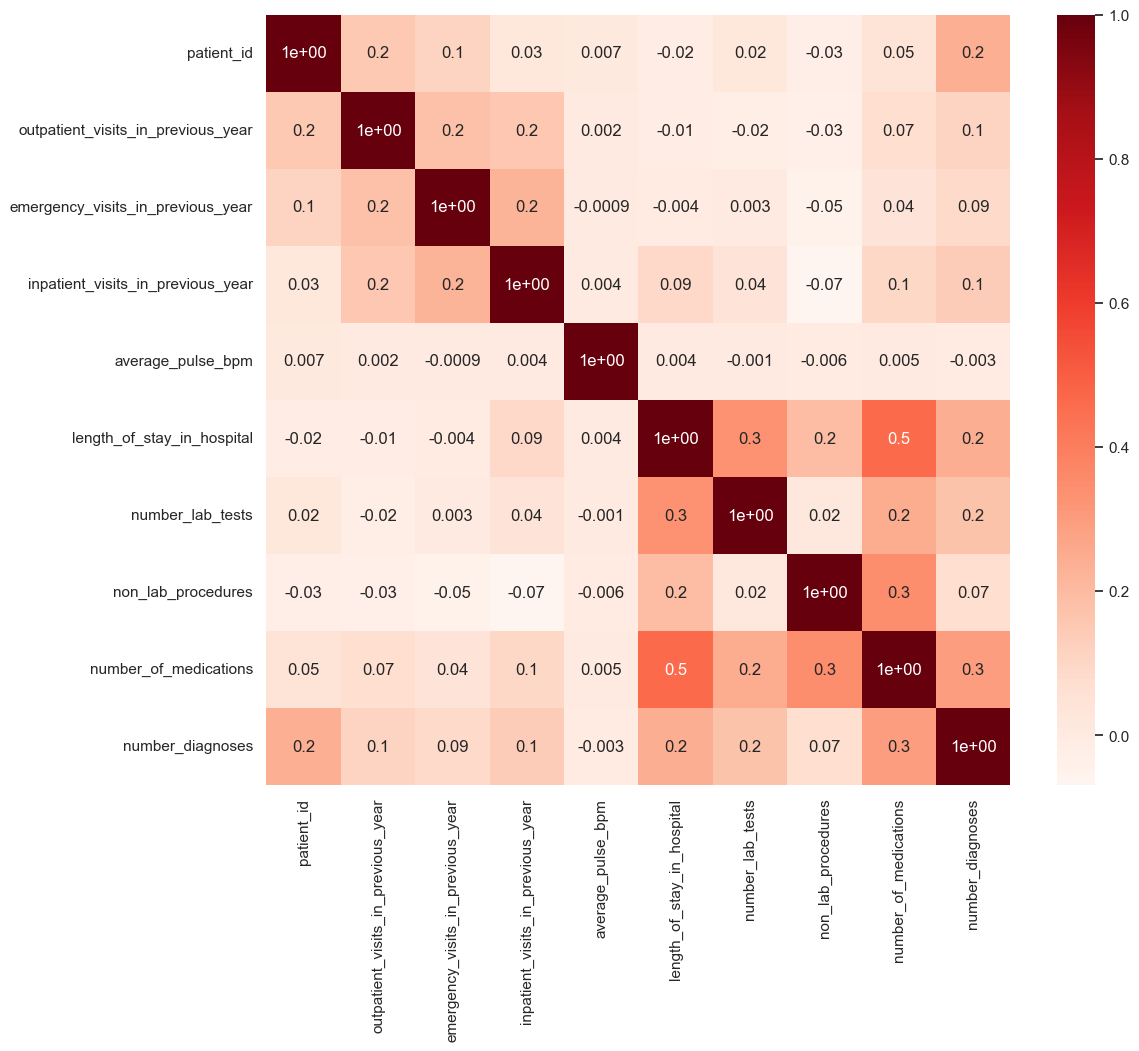

In [143]:
cor_heatmap(cor_spearman)

2.1.3. Chi-Square for categorical data

In [144]:
def TestIndependence(X,y,var,alpha=0.05):        
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

In [145]:
for var in X_train_cat:
    TestIndependence(X_train_cat[var],y_train, var)

country is NOT an important predictor. (Discard country from model)
race is IMPORTANT for Prediction
gender is NOT an important predictor. (Discard gender from model)
age is IMPORTANT for Prediction
weight is NOT an important predictor. (Discard weight from model)
payer_code is IMPORTANT for Prediction
admission_type is IMPORTANT for Prediction
medical_specialty is IMPORTANT for Prediction
discharge_disposition is IMPORTANT for Prediction
admission_source is IMPORTANT for Prediction
primary_diagnosis is IMPORTANT for Prediction
secondary_diagnosis is IMPORTANT for Prediction
additional_diagnosis is IMPORTANT for Prediction
glucose_test_result is IMPORTANT for Prediction
a1c_test_result is IMPORTANT for Prediction
change_in_meds_during_hospitalization is IMPORTANT for Prediction
prescribed_diabetes_meds is IMPORTANT for Prediction
medication is IMPORTANT for Prediction


2.2. Wrapper Methods

2.2.1. RFE

In [146]:
model = LogisticRegression()

In [147]:
rfe = RFE(estimator = model, n_features_to_select = 3)

In [148]:
X_rfe = rfe.fit_transform(X = X_train_num_scaled, y = y_train)

In [149]:
X_train_num_scaled.columns

Index(['patient_id', 'outpatient_visits_in_previous_year',
       'emergency_visits_in_previous_year',
       'inpatient_visits_in_previous_year', 'average_pulse_bpm',
       'length_of_stay_in_hospital', 'number_lab_tests', 'non_lab_procedures',
       'number_of_medications', 'number_diagnoses'],
      dtype='object')

In [150]:
rfe.support_

array([False, False,  True,  True, False, False, False, False, False,
        True])

In [151]:
rfe.ranking_

array([7, 4, 1, 1, 8, 3, 6, 5, 2, 1])

In [152]:
selected_features = pd.Series(rfe.support_, index = X_train_num_scaled.columns)
selected_features

patient_id                            False
outpatient_visits_in_previous_year    False
emergency_visits_in_previous_year      True
inpatient_visits_in_previous_year      True
average_pulse_bpm                     False
length_of_stay_in_hospital            False
number_lab_tests                      False
non_lab_procedures                    False
number_of_medications                 False
number_diagnoses                       True
dtype: bool

In [153]:
#no of features
nof_list=np.arange(1,8)            
high_score=0
#Variable to store the optimum features
nof=0           
train_score_list =[]
val_score_list = []

for n in range(len(nof_list)):
    model = LogisticRegression()
    
    rfe = RFE(estimator = model,n_features_to_select = nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train_num_scaled,y_train)
    X_val_rfe = rfe.transform(X_val_num_scaled)
    model.fit(X_train_rfe,y_train)
    
    #storing results on training data
    train_score = model.score(X_train_rfe,y_train)
    train_score_list.append(train_score)
    
    #storing results on training data
    val_score = model.score(X_val_rfe,y_val)
    val_score_list.append(val_score)
    
    #check best score
    if(val_score >= high_score):
        high_score = val_score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 7
Score with 7 features: 0.888962


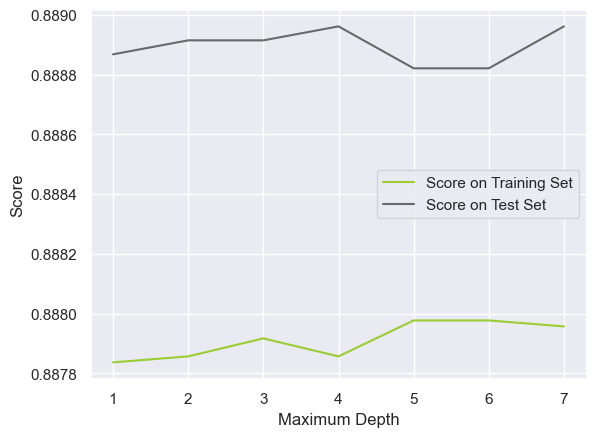

In [154]:
plt.plot(list(range(1,8)), train_score_list, label="Score on Training Set", color='yellowgreen')
plt.plot(list(range(1,8)), val_score_list, label="Score on Test Set", color='dimgray')
plt.xlabel("Maximum Depth")
plt.ylabel("Score")
plt.legend()
plt.show()

In [155]:
#no of features
nof_list= np.arange(1,8)            
high_score=0
#Variable to store the optimum features
nof=0           
train_score_list =[]
val_score_list = []

for n in range(len(nof_list)):
    #call support vector machines classifier
    model = SVC(kernel = 'linear')
    
    #create RFE instance
    rfe = RFE(estimator = model,n_features_to_select = nof_list[n])
    
    #fit and transform for training data, transform for val data
    X_train_rfe = rfe.fit_transform(X_train_num_scaled,y_train)
    X_val_rfe = rfe.transform(X_val_num_scaled)
    
    model.fit(X_train_rfe,y_train)
    
    #storing results on training data
    train_score = model.score(X_train_rfe,y_train)
    train_score_list.append(train_score)
    
    #storing results on training data
    val_score = model.score(X_val_rfe,y_val)
    val_score_list.append(val_score)
    
    #check best score
    if(val_score > high_score):
        high_score = val_score
        nof = nof_list[n]
        
        #adding mention of variables to keep
        features_to_select = pd.Series(rfe.support_, index = X_train_num_scaled.columns)
        
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))
print(f"Features to select: \n{features_to_select}")

KeyboardInterrupt: 

ValueError: x and y must have same first dimension, but have shapes (7,) and (0,)

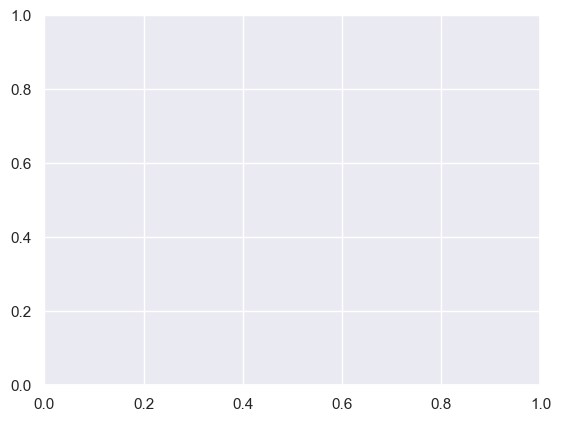

In [ ]:
plt.plot(list(range(1,8)), train_score_list, label="Score on Training Set", color='yellowgreen')
plt.plot(list(range(1,8)), val_score_list, label="Score on Test Set", color='dimgray')
plt.xlabel("Maximum Depth")
plt.ylabel("Score")
plt.legend()
plt.show()

2.3. Embedded Methods

2.3.1. Lasso Regression

In [156]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [157]:
reg = LassoCV()

In [158]:
reg.fit(X_train_num_scaled, y_train)

ValueError: could not convert string to float: 'No'

In [ ]:
coef = pd.Series(reg.coef_, index = X_train_num_scaled.columns)
coef

AttributeError: 'LassoCV' object has no attribute 'coef_'